a) We start from one group neutron diffusion equation
\begin{equation*}
\nabla.\vec{J} + \Sigma_a \phi - Q = 0 
\label{eqn1}\tag{1}
\end{equation*}
where $\vec{J} = -D\nabla\phi$ is neutron's current. We want to solve $\eqref{eqn1}$ in the following geometry, given boundary condition $\phi = 0$ at the outer boundary.
<img src="geometry.png" style = "width:500px;height:300px"/>
In finite difference method (FDM), we discretize the geometry into a mesh with size $\Delta x\Delta y$. If we integrate $\eqref{eqn1}$ over a unit of mesh, we obtain
\begin{equation*}
\int\vec{J}.\vec{dn} + \Sigma_a \bar{\phi}\Delta x\Delta y - Q\Delta x\Delta y = 0
\label{eqn2}\tag{2}
\end{equation*}
where $\bar{\phi} = \frac{1}{\Delta x \Delta y}\int\int \phi \; dx\;dy$ is the average neutron flux within a box between $x$ and $x+\Delta x$. Let's call the inner rectangle as material A and the outer rectangular shell as material B. We begin by considering __non-boundary region__. In such region $D$, $\Sigma_a$, and $Q$ are constants. Then, we can define

\begin{equation*}
J_{i,j}^{(x)} = -D\frac{\bar{\phi}_{i+1,j}-\bar{\phi}_{i,j}}{\Delta x} \qquad J_{i,j}^{(y)} = -D\frac{\bar{\phi}_{i,j+1}-\bar{\phi}_{i,j}}{\Delta y}
\label{eqn3}\tag{3}
\end{equation*}
Using the definition above, we can write down $\eqref{eqn2}$ at index $i,j$ as
$$(J_{i,j}-J_{i-1,j})\Delta y + (J_{i,j}-J_{i,j-1})\Delta x + \Sigma_a \bar{\phi}_{i,j}\Delta x\Delta y - Q\Delta x\Delta y = 0$$
Substituing $\eqref{eqn3}$, we obtain 5 points difference equation
\begin{equation*}
a\bar{\phi}_{i,j} + b\bar{\phi}_{i-1,j} +  c\bar{\phi}_{i+1,j} +  d\bar{\phi}_{i,j-1}+ e\bar{\phi}_{i,j+1} = f
\end{equation*}
Assuming $\Delta x = \Delta y$, the coefficients are $a = (4D_A + \Sigma_a^{A} \Delta x^2)$, $b=c=d=e=-D_A$ and $f = Q_A\Delta x^2$ in the material A (non-boundary). Whereas at the non-boundary region of B, we have $a = (4D_B + \Sigma_a^{B} \Delta x^2)$, $b=c=d=e=-D_B$ and $f = Q_B\Delta x^2$. Plugging in the numbers yield

Non-boundary of A
\begin{equation*}
\boxed{(4+0.7\Delta x^2)\bar{\phi}_{i,j} -\bar{\phi}_{i-1,j} -\bar{\phi}_{i+1,j} -\bar{\phi}_{i,j-1}-\bar{\phi}_{i,j+1} = \Delta x^2}
\label{eqn4}\tag{4}
\end{equation*}

Non-boundary of B
\begin{equation*}
\boxed{(2+0.3\Delta x^2)\bar{\phi}_{i,j} -0.5\bar{\phi}_{i-1,j} -0.5\bar{\phi}_{i+1,j} -0.5\bar{\phi}_{i,j-1}-0.5\bar{\phi}_{i,j+1} = 0}
\label{eqn5}\tag{5}
\end{equation*}

<img src="boundary.png" style = "width:500px;height:300px"/>

As shown in the image above, there are 5 boundary regions that need to be considered: non-corner boundary of A (orange), corners of A (blue), inner boundary of B (green), outer non-corner boundary of B (red), and corners of B (black). At the __non-corner boundary__ of A, $\eqref{eqn4}$ must be modified into ($g = 3D_A + \frac{2D_A D_B}{D_A+D_B}+\Sigma_{a}^{A}\Delta x^2$, $h = -\frac{2D_A D_B}{D_A+D_B}$):

Top boundary (A)
\begin{equation*}
g\bar{\phi}_{i,j} + b\bar{\phi}_{i-1,j} +  c\bar{\phi}_{i+1,j} +  d\bar{\phi}_{i,j-1}+h\bar{\phi}_{i,j+1} = f
\end{equation*}

\begin{equation*}
\boxed{\Big(\frac{11}{3}+0.7\Delta x^2\Big)\bar{\phi}_{i,j} -\bar{\phi}_{i-1,j} -\bar{\phi}_{i+1,j} -\bar{\phi}_{i,j-1}-\frac{2}{3}\bar{\phi}_{i,j+1} = \Delta x^2}
\label{eqn6}\tag{6}
\end{equation*}

Bottom boundary (A)
\begin{equation*}
g\bar{\phi}_{i,j} + b\bar{\phi}_{i-1,j} +  c\bar{\phi}_{i+1,j} +  h\bar{\phi}_{i,j-1}+ e\bar{\phi}_{i,j+1} = f
\end{equation*}

\begin{equation*}
\boxed{\Big(\frac{11}{3}+0.7\Delta x^2\Big)\bar{\phi}_{i,j} -\bar{\phi}_{i-1,j} -\bar{\phi}_{i+1,j} -\frac{2}{3}\bar{\phi}_{i,j-1} -\bar{\phi}_{i,j+1} = \Delta x^2}
\label{eqn7}\tag{7}
\end{equation*}

Right boundary (A)
\begin{equation*}
g\bar{\phi}_{i,j} + b\bar{\phi}_{i-1,j} +  h\bar{\phi}_{i+1,j} +  d\bar{\phi}_{i,j-1}+ e\bar{\phi}_{i,j+1} = f
\end{equation*}

\begin{equation*}
\boxed{\Big(\frac{11}{3}+0.7\Delta x^2\Big)\bar{\phi}_{i,j} -\bar{\phi}_{i-1,j}-\frac{2}{3}\bar{\phi}_{i+1,j} -\bar{\phi}_{i,j-1}-\bar{\phi}_{i,j+1} = \Delta x^2}
\label{eqn8}\tag{8}
\end{equation*}

Left boundary (A)
\begin{equation*}
g\bar{\phi}_{i,j} + h\bar{\phi}_{i-1,j} +  c\bar{\phi}_{i+1,j} +  d\bar{\phi}_{i,j-1}+ e\bar{\phi}_{i,j+1} = f
\end{equation*}

\begin{equation*}
\boxed{\Big(\frac{11}{3}+0.7\Delta x^2\Big)\bar{\phi}_{i,j} -\frac{2}{3}\bar{\phi}_{i-1,j}-\bar{\phi}_{i+1,j} -\bar{\phi}_{i,j-1}-\bar{\phi}_{i,j+1} = \Delta x^2}
\label{eqn9}\tag{9}
\end{equation*}

Meanwhile, at the corner of A, we have ($G = 2D_A + \frac{4D_A D_B}{D_A+D_B}+\Sigma_{a}^{A}\Delta x^2$)

Top left corner (A)
\begin{equation*}
G\bar{\phi}_{i,j} + h\bar{\phi}_{i-1,j} +  c\bar{\phi}_{i+1,j} +  d\bar{\phi}_{i,j-1}+ h\bar{\phi}_{i,j+1} = f
\end{equation*}

\begin{equation*}
\boxed{\Big(\frac{10}{3} + 0.7\Delta x^2\Big)\bar{\phi}_{i,j} -\frac{2}{3}\bar{\phi}_{i-1,j} - \bar{\phi}_{i+1,j}-\bar{\phi}_{i,j-1}-\frac{2}{3}\bar{\phi}_{i,j+1} = \Delta x^2}
\label{eqn10}\tag{10}
\end{equation*}

Bottom left corner (A)
\begin{equation*}
G\bar{\phi}_{i,j} + h\bar{\phi}_{i-1,j} +  c\bar{\phi}_{i+1,j} +  h\bar{\phi}_{i,j-1}+ e\bar{\phi}_{i,j+1} = f
\end{equation*}

\begin{equation*}
\boxed{\Big(\frac{10}{3} + 0.7\Delta x^2\Big)\bar{\phi}_{i,j} -\frac{2}{3}\bar{\phi}_{i-1,j} - \bar{\phi}_{i+1,j}-\frac{2}{3}\bar{\phi}_{i,j-1}-\bar{\phi}_{i,j+1} = \Delta x^2}
\label{eqn11}\tag{11}
\end{equation*}

Top right corner (A)
\begin{equation*}
G\bar{\phi}_{i,j} + b\bar{\phi}_{i-1,j} +  h\bar{\phi}_{i+1,j} +  d\bar{\phi}_{i,j-1}+ h\bar{\phi}_{i,j+1} = f
\end{equation*}

\begin{equation*}
\boxed{\Big(\frac{10}{3} + 0.7\Delta x^2\Big)\bar{\phi}_{i,j} -\bar{\phi}_{i-1,j} -\frac{2}{3} \bar{\phi}_{i+1,j}-\bar{\phi}_{i,j-1}-\frac{2}{3}\bar{\phi}_{i,j+1} = \Delta x^2}
\label{eqn12}\tag{12}
\end{equation*}


Bottom right corner (A)
\begin{equation*}
G\bar{\phi}_{i,j} + b\bar{\phi}_{i-1,j} +  h\bar{\phi}_{i+1,j} +  h\bar{\phi}_{i,j-1}+ e\bar{\phi}_{i,j+1} = f
\end{equation*}

\begin{equation*}
\boxed{\Big(\frac{10}{3} + 0.7\Delta x^2\Big)\bar{\phi}_{i,j} -\bar{\phi}_{i-1,j} -\frac{2}{3} \bar{\phi}_{i+1,j}-\frac{2}{3}\bar{\phi}_{i,j-1}-\bar{\phi}_{i,j+1} = \Delta x^2}
\label{eqn13}\tag{13}
\end{equation*}

Material B has both inner and outer boundary. The inner boundary conditions are given by

Top inner (B)
\begin{equation*}
\boxed{\Big(\frac{13}{6}+0.3\Delta x^2\Big)\bar{\phi}_{i,j} -0.5\bar{\phi}_{i-1,j} -0.5\bar{\phi}_{i+1,j} -\frac{2}{3}\bar{\phi}_{i,j-1} -0.5\bar{\phi}_{i,j+1} = 0}
\label{eqn14}\tag{14}
\end{equation*}

Bottom inner (B)
\begin{equation*}
\boxed{\Big(\frac{13}{6}+0.3\Delta x^2\Big)\bar{\phi}_{i,j} -0.5\bar{\phi}_{i-1,j} -0.5\bar{\phi}_{i+1,j} -0.5\bar{\phi}_{i,j-1}-\frac{2}{3}\bar{\phi}_{i,j+1} = 0}
\label{eqn15}\tag{15}
\end{equation*}

Right inner (B)
\begin{equation*}
\boxed{\Big(\frac{13}{6}+0.3\Delta x^2\Big)\bar{\phi}_{i,j} -\frac{2}{3}\bar{\phi}_{i-1,j} -0.5\bar{\phi}_{i+1,j} -0.5\bar{\phi}_{i,j-1}-0.5\bar{\phi}_{i,j+1} = 0}
\label{eqn16}\tag{16}
\end{equation*}

Left inner (B)
\begin{equation*}
\boxed{\Big(\frac{13}{6}+0.3\Delta x^2\Big)\bar{\phi}_{i,j} -0.5\bar{\phi}_{i-1,j} -\frac{2}{3}\bar{\phi}_{i+1,j} -0.5\bar{\phi}_{i,j-1}-0.5\bar{\phi}_{i,j+1} = 0}
\label{eqn17}\tag{17}
\end{equation*}

where we have used the fact: $3D_{B}+\frac{2D_A D_B}{D_A+D_B} = \frac{11}{6}$. Next, we consider the outer non-corner boundary of B. 

Top outer (B)
\begin{equation*}
\boxed{(2+0.3\Delta x^2)\bar{\phi}_{i,j} - 0.5\bar{\phi}_{i-1,j} -0.5\bar{\phi}_{i+1,j} -0.5\bar{\phi}_{i,j-1} = 0}
\label{eqn18}\tag{18}
\end{equation*}.

Bottom outer (B)
\begin{equation*}
\boxed{(2+0.3\Delta x^2)\bar{\phi}_{i,j} -0.5 \bar{\phi}_{i-1,j} -0.5\bar{\phi}_{i+1,j} -0.5\bar{\phi}_{i,j+1} = 0}
\label{eqn19}\tag{19}
\end{equation*}

Right outer (B)
\begin{equation*}
\boxed{(2+0.3\Delta x^2)\bar{\phi}_{i,j} -0.5\bar{\phi}_{i-1,j} -0.5\bar{\phi}_{i,j-1} -0.5\bar{\phi}_{i,j+1} = 0}
\label{eqn20}\tag{20}
\end{equation*}

Left outer (B)
\begin{equation*}
\boxed{(2+0.3\Delta x^2)\bar{\phi}_{i,j} -0.5\bar{\phi}_{i+1,j} -0.5\bar{\phi}_{i,j-1} -0.5\bar{\phi}_{i,j+1} = 0}
\label{eqn21}\tag{21}
\end{equation*}

Lastly, at the corners of B,

Top left (B)
\begin{equation*}
\boxed{(2+0.3\Delta x^2)\bar{\phi}_{i,j} -0.5\bar{\phi}_{i+1,j} -0.5\bar{\phi}_{i,j-1} = 0}
\label{eqn22}\tag{22}
\end{equation*}.

Bottom left (B)
\begin{equation*}
\boxed{(2+0.3\Delta x^2)\bar{\phi}_{i,j} -0.5\bar{\phi}_{i+1,j} -0.5\bar{\phi}_{i,j+1} = 0}
\label{eqn23}\tag{23}
\end{equation*}

Top right (B)
\begin{equation*}
\boxed{(2+0.3\Delta x^2)\bar{\phi}_{i,j} -0.5\bar{\phi}_{i-1,j} -0.5\bar{\phi}_{i,j-1} = 0}
\label{eqn24}\tag{24}
\end{equation*}

Bottom right (B)
\begin{equation*}
\boxed{(2+0.3\Delta x^2)\bar{\phi}_{i,j} -0.5\bar{\phi}_{i+1,j} -0.5\bar{\phi}_{i,j+1} = 0}
\label{eqn25}\tag{25}
\end{equation*}
Index $i$ and $j$ ranges from $0$ to $\frac{X}{\Delta x} -1$ and $0$ to $\frac{Y}{\Delta y} -1$ respectively. In line indexing scheme, we convert the double index $i,j$ into a single index $k$ according to
\begin{equation*}
k = i+\frac{X}{\Delta x}j
\label{eqn26}\tag{26}
\end{equation*}

Using finite difference equations $\eqref{eqn4}-\eqref{eqn25}$ and the line indexing scheme $\eqref{eqn26}$, we can find the solution to PDE $\eqref{eqn1}$ in the given geometry by solving $A\Phi = q$, where $\Phi$ is our solution vector and $A, q$ are coefficient matrices.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sparse

#Assuming X = Y = 100 cm, a=c=10 cm, b=d=90 cm, and delta x =1 cm
A = np.zeros((10000,10000))
b = np.zeros(10000)
#Filling up the matrix
#Start from the corners of B
A[0][0] = A[99][99]=A[9999][9999]=A[9900][9900]=2.3
A[0][100] = A[0][1] = A[99][98]= A[99][199] = A[9999][9998] = A[9999][9899] = A[9900][9901] = A[9900][9800] = -0.5

#Outer non-corner boundary of B
#Top
for i in range(9901,9999):
    A[i][i]=2.3; A[i][i-1]=A[i][i+1]=A[i][i-100]=-0.5
#Bottom
for i in range(1,99):
    A[i][i]=2.3; A[i][i-1]=A[i][i+1]=A[i][i+100]=-0.5
#Left
for i in range(100,9900,100):
    A[i][i]=2.3; A[i][i+1]=A[i][i+100]=A[i][i-100]=-0.5
#Right
for i in range(199,9999,100):
    A[i][i]=2.3; A[i][i-1]=A[i][i+100]=A[i][i-100]=-0.5

#Inner boundary of B
#Top
for i in range(9010,9090):
    A[i][i]=(13/6)+0.3; A[i][i-1]=A[i][i+1]=A[i][i+100]=-0.5; A[i][i-100]=-2/3    
#Bottom
for i in range(910,990):
    A[i][i]=(13/6)+0.3; A[i][i-1]=A[i][i+1]=A[i][i-100]=-0.5; A[i][i+100]=-2/3
#Left
for i in range(1009,9009,100):
    A[i][i]=(13/6)+0.3; A[i][i-1]=A[i][i-100]=A[i][i+100]=-0.5; A[i][i+1]=-2/3
#Right
for i in range(1090,9090,100):
    A[i][i]=(13/6)+0.3; A[i][i+1]=A[i][i-100]=A[i][i+100]=-0.5; A[i][i-1]=-2/3
        
#Non-boundary region of B
for j in range(101,901,100):
    for i in range(j,j+98):
        A[i][i] = 2.3; A[i][i+1]=A[i][i-100]=A[i][i+100]=A[i][i-1]=-0.5
for j in range (9101,9901,100):
    for i in range(j,j+98):
        A[i][i] = 2.3; A[i][i+1]=A[i][i-100]=A[i][i+100]=A[i][i-1]=-0.5
for j in range(901,9101,100):
    for i in range(j,j+8):
        A[i][i] = 2.3; A[i][i+1]=A[i][i-100]=A[i][i+100]=A[i][i-1]=-0.5
for j in range(991,9191,100):
    for i in range(j,j+8):
        A[i][i] = 2.3; A[i][i+1]=A[i][i-100]=A[i][i+100]=A[i][i-1]=-0.5
        
inner_corner = [909,990,9009,9090]
for i in range(len(inner_corner)):
    A[inner_corner[i]][inner_corner[i]]=2.3; A[inner_corner[i]][inner_corner[i]+1]=A[inner_corner[i]][inner_corner[i]-100]=A[inner_corner[i]][inner_corner[i]+100]=A[inner_corner[i]][inner_corner[i]-1]=-0.5



#Corners of A
A[1010][1010]=A[8910][8910]=A[1089][1089]=A[8989][8989]=(10/3)+0.7
b[1010]=b[8910]=b[1089]=b[8989]=1
A[1010][1011]=A[1010][1110]=A[1089][1189]=A[1089][1088]=A[8910][8911]=A[8910][8810]=A[8989][8988]=A[8989][8889]=-1
A[1010][1009]=A[1010][910]=A[1089][1090]=A[1089][989]=A[8910][8909]=A[8910][9010]=A[8989][9089]=A[8989][8990]=-2/3
#Non-corner boundary of A
#Top
for i in range (8911,8989):
    A[i][i]=(11/3)+0.7; A[i][i-1]=A[i][i+1]=A[i][i-100]=-1; A[i][i+100]=-2/3; b[i]=1
#Bottom
for i in range(1011,1089):
    A[i][i]=(11/3)+0.7; A[i][i-1]=A[i][i+1]=A[i][i+100]=-1; A[i][i-100]=-2/3; b[i]=1
#Left
for i in range(1110,8910,100):
    A[i][i]=(11/3)+0.7; A[i][i+1]=A[i][i+100]=A[i][i-100]=-1; A[i][i-1]=-2/3; b[i]=1
#Right
for i in range(1189,8989,100):
    A[i][i]=(11/3)+0.7; A[i][i-1]=A[i][i+100]=A[i][i-100]=-1; A[i][i+1]=-2/3; b[i]=1
    
    
#Non-boundary region of A
for j in range(1111,8911,100):
    for i in range(j,j+78):
        A[i][i]=4.7;A[i][i+1]=A[i][i-100]=A[i][i+100]=A[i][i-1]=-1
        b[i] = 1

#Calculating sparcity of A and visualizing the matrix structure
sparcity = 1-np.count_nonzero(A)/np.size(A)
print(sparcity)
A_comp= sparse.csr_matrix(A)
b_comp= sparse.csr_matrix(b)
plt.spy(A_comp,markersize=2)
plt.figure(figsize=(100,100))
plt.show()

0.999504


<Figure size 640x480 with 1 Axes>

<Figure size 10000x10000 with 0 Axes>

31.03592274119218
11.950697932898555
4.630600421590966
1.8206393254219186
0.7331539828504854
0.3060641242000072
0.13460759400281644
0.06354374770584306
0.032642138689054176
Converges after: 9 iterations
Computation time: 842.669148683548 seconds


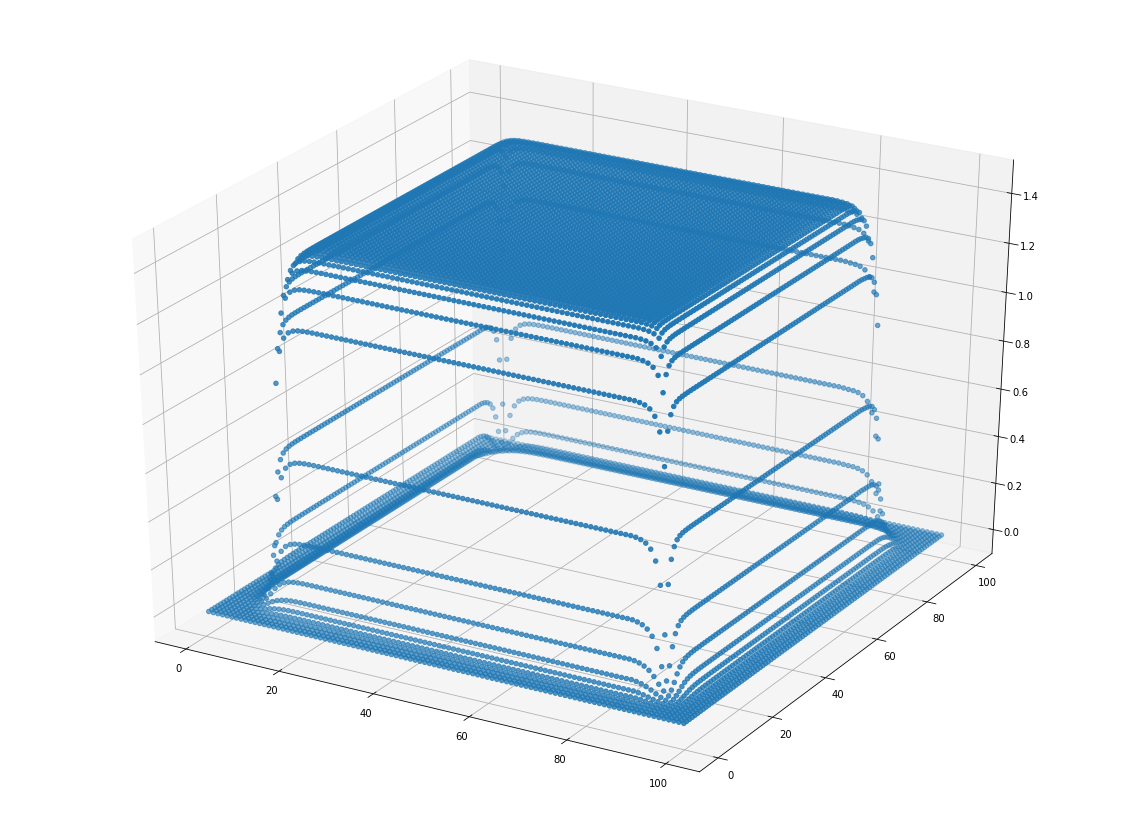

In [35]:
import numpy.linalg as la
import math
import matplotlib.pyplot as plt
import time

def SOR(A, b, x_init, w, epsi):
    start_time = time.time()
    x=x_init
    err = b-np.matmul(A,x)
    n = 0
    while la.norm(err)>epsi:
        for i in range(len(x_init)):
            GS = 0 #Gauss-siedel term
            for j in range(len(x_init)):
                if j!=i:
                    GS-=(A[i][j]/A[i][i])*x[j]
            GS += b[i]/A[i][i]
            x[i] = (1-w)*x[i]+w*GS
        n+=1
        err = b-np.matmul(A,x)
        print(la.norm(err))
    end_time = time.time()
    print("Converges after: "+str(n)+" iterations")
    print("Computation time: "+str(end_time-start_time)+ " seconds")
    return x

phi_init=np.zeros(10000)
phi = SOR(A,b,phi_init,1.5,0.05)
xdata = []; ydata = []
for i in range(len(phi)):
    xdata.append(i%100+0.5)
    ydata.append(math.floor(i/100)+0.5)
fig =plt.figure(figsize=(20,15))
ax =plt.axes(projection='3d')
ax.scatter3D(xdata, ydata, phi)
plt.savefig('neutron_flux_SOR')

12.549978022940016
4.291096227244543
2.5295362025171473
1.5955229248195784
1.029624402789844
0.6703975010567053
0.43973250665350133
0.2897553676312084
0.19159620588391804
0.12704056458573218
0.0833435797652841
0.052148792232274165
0.03372144349138625
Converges after: 13 iterations
Computation time: 1303.893171787262 seconds


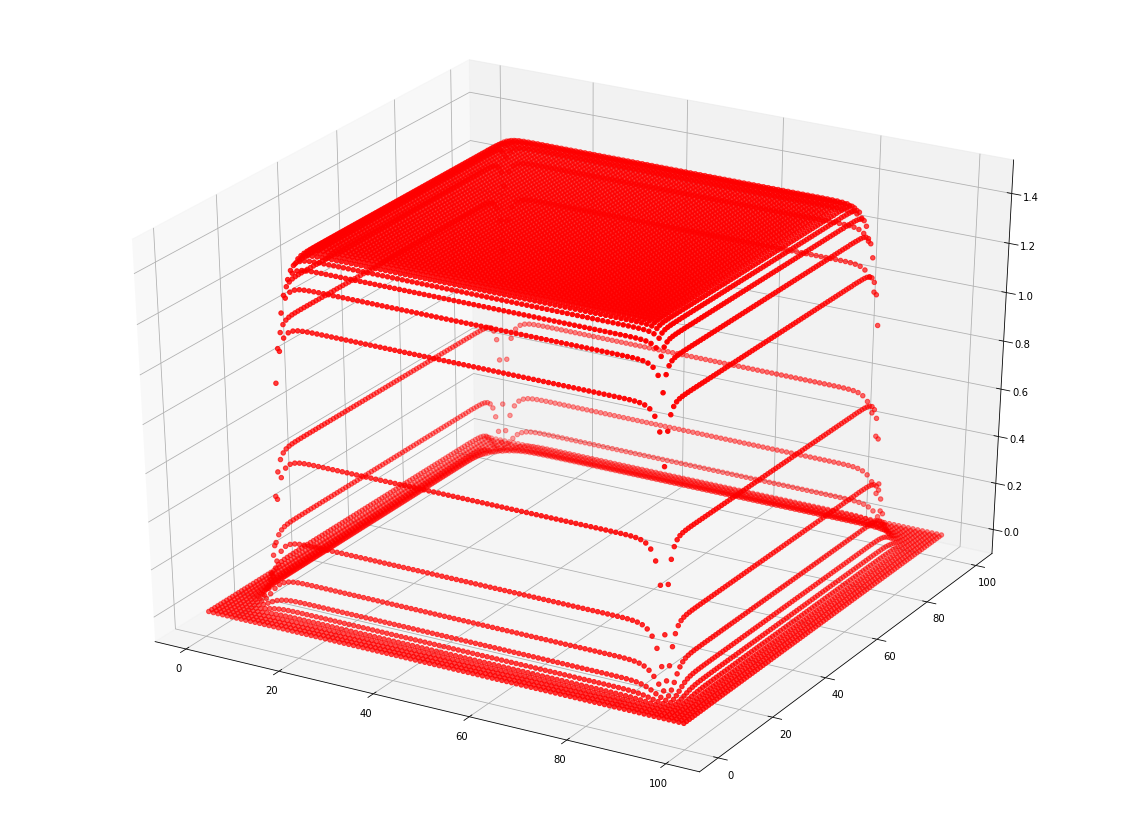

In [10]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import math
import time

def gauss_elim(A,b):
    n = len(A)-1
    #Forward elimination
        #Forward elimination
    for i in range(n):
        for j in range(i+1,n+1):
            b[j]=b[j]-b[i]*A[j][i]/A[i][i]
            A[j]=np.subtract(A[j],[k*A[j][i]/A[i][i] for k in A[i]]).tolist()
    #Backward substituion
    x=[b[n]/A[n][n]]
    for i in range(n-1,-1,-1):
        term=b[i]
        for j in range(i+1,n+1):
            term -= A[i][j]*x[n-j]
        term = term/A[i][i]
        x.append(term)
    x.reverse()
    return np.array(x)

def SLOR(A,b,x_init,w,epsi,linesize):
    start_time = time.time()
    x = x_init
    err = b-np.matmul(A,x)
    n=0
    while (la.norm(err)>epsi):
        for j in range(0,len(A),linesize):
            A_line = np.zeros((linesize,linesize))
            b_line = np.zeros(linesize)
            for i in range(linesize):
                A_line[i] = A[j+i][j:j+linesize]
                b_line[i] = b[j+i]
                if j+i-linesize>= 0:
                    b_line[i]-=A[j+i][j+i-linesize]*x[j+i-linesize]
                if j+i+linesize<len(A):
                    b_line[i]-=A[j+i][j+i+linesize]*x[j+i+linesize]
            x[j:j+linesize] = w*gauss_elim(A_line,b_line)+(1-w)*x[j:j+linesize]
        n+=1
        err = b-np.matmul(A,x)
        print(la.norm(err))
    end_time = time.time()
    print("Converges after: "+str(n)+" iterations")
    print("Computation time: "+str(end_time-start_time)+" seconds")
    return x

phi_init=np.zeros(10000)
phi = SLOR(A,b,phi_init,1.5,0.05,100)
xdata = []
ydata = []
for i in range(len(phi)):
    xdata.append(i%100+0.5)
    ydata.append(math.floor(i/100)+0.5)
fig =plt.figure(figsize=(20,15))
ax =plt.axes(projection='3d')
ax.scatter3D(xdata, ydata, phi, c='r')
plt.savefig('neutron_flux_SLOR')

22.85419107268459
8.440774309032246
5.325254238341134
3.961719052918632
3.2118311346707547
2.62567595473851
2.290675406823833
1.961436046758377
1.743841029819128
1.5149087062230648
1.3606344269608883
1.1925120898244466
1.0784372277487881
0.9510815135011937
0.8644794710900163
0.7659931643885287
0.6990170557848512
0.6217012050302939
0.5691716538926684
0.5077660838173015
0.4661067909730096
0.41688112515292414
0.3835418413081612
0.3437770305359005
0.3168940425613277
0.2845655082647448
0.26274991872891273
0.2363240183594917
0.21852394917877271
0.19682224285150132
0.18223015999713943
0.16433618884024695
0.1523249109809337
0.13751861215068883
0.12759614391971416
0.11530675971002124
0.10708380341752766
0.09685546776428738
0.0900216632735385
0.08148786005313015
0.07579414953318807
0.06865849378949569
0.06390385880004967
0.05792545866796562
0.053946827386693125
0.04892901399100467
Converges after 46 iterations
Computing time 4.466104745864868 seconds


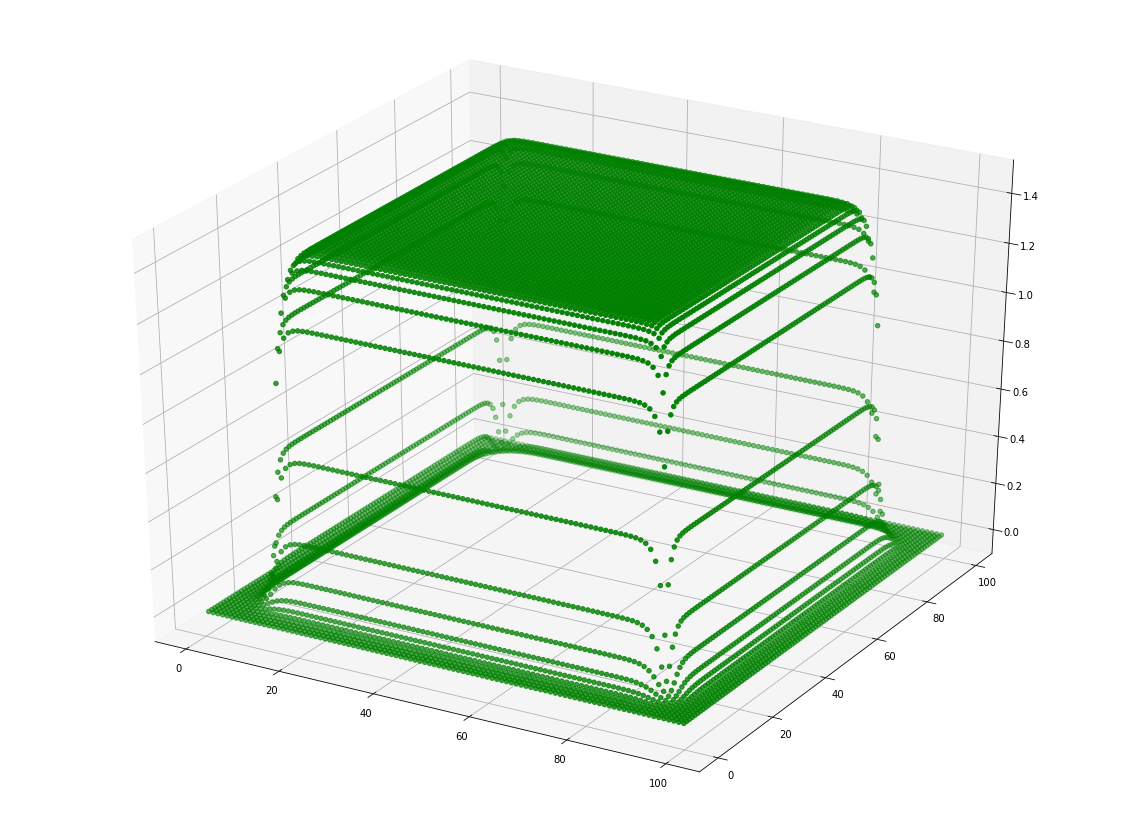

In [9]:
import numpy as np
import numpy.linalg as la
import time
import math
def CG(A, b, x_init, epsi):
    start_time = time.time()
    x = x_init
    r = b - np.matmul(A,x)
    n = 0
    while la.norm(r)>epsi:
        r_prime = np.matmul(A,r)
        stepsize = np.dot(r,r)/np.dot(r,r_prime)
        x = x + stepsize*r
        r = r - stepsize*r_prime
        print(la.norm(r))
        n+=1
    end_time = time.time()
    print("Converges after "+str(n)+" iterations")
    print("Computing time "+str(end_time-start_time)+" seconds")
    return x

phi_init=np.zeros(10000)
phi = CG(A,b,phi_init,0.05)
xdata = [];ydata = []
for i in range(len(phi)):
    xdata.append(i%100+0.5)
    ydata.append(math.floor(i/100)+0.5)
fig =plt.figure(figsize=(20,15))
ax =plt.axes(projection='3d')
ax.scatter3D(xdata, ydata, phi, c='g')
plt.savefig('neutron_flux_CG')